In [1]:
import json
import re
import sys
from konlpy.tag import Twitter
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc
import pytagcloud
import pandas as pd
from pandas import Series, DataFrame    

In [2]:
def showGraph(dust):
    font_location="C:\Windows\Fonts\HYKANB.ttf"
    font_name=font=font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font',family=font_name)
    plt.xlabel('주요단어')
    plt.ylabel('빈도수')
    plt.grid(True)

    Sorted_Dict_Values=sorted(dust.values(),reverse=True)
    Sorted_Dict_Keys=sorted(dust, key=dust.get, reverse=True)
    plt.bar(range(len(dust)),Sorted_Dict_Values,align='center')
    plt.xticks(range(len(dust)),list(Sorted_Dict_Keys),rotation='70') 
    plt.show()

In [3]:
def saveWorldCloud(wordInfo, filename): 
    taglist=pytagcloud.make_tags(dict(wordInfo).items(),maxsize=80)
    pytagcloud.create_tag_image(taglist,filename,size=(1024,768),fontname='kor',rectangular=False)

In [4]:
def get_tags(text, ntags=50):
    spliter = Twitter()
    # konlpy의 Twitter객체
    nouns = spliter.nouns(text)
    # nouns 함수를 통해서 text에서 명사만 분리/추출
    count = Counter(nouns)
    # Counter객체를 생성하고 참조변수 nouns할당
    return_list = []  # 명사 빈도수 저장할 변수
    for n, c in count.most_common(ntags):
        temp = {'tag': n, 'count': c}
        return_list.append(temp)
    # most_common 메소드는 정수를 입력받아 객체 안의 명사중 빈도수
    # 큰 명사부터 순서대로 입력받은 정수 갯수만큼 저장되어있는 객체 반환
    # 명사와 사용된 갯수를 return_list에 저장합니다.
    return return_list 

In [5]:
def main():
    openFileName='남북정상회담 전_naver.json'
    output_file_Name ='남북정상회담 전(word파일).json'
    cloudImageFile='wordcloud_Before.jpg'
    rfile=open(openFileName, 'r', encoding='utf-8').read()
    open_output_file= open(output_file_Name, 'w', encoding='utf-8')
    jsonData=json.loads(rfile)
    message=""
    for item in jsonData:
        if 'description' in item.keys():
            message=message+re.sub(r'[^\w]', '', item['description'])+'' 
            
    nlp=Twitter()
    nouns=nlp.nouns(message)
    count=Counter(nouns)
    
    wordInfo=dict()
    for tags, counts in count.most_common(50):
        if (len(str(tags))>1):
            wordInfo[tags]=counts
            print("%s : %d" % (tags, counts))

    open_output_file.write('{} {}\n'.format(nouns, count)) 
    saveWorldCloud(wordInfo,cloudImageFile)


In [6]:
if __name__=="__main__":
    main()

남북정상회담 : 872
북한 : 438
정상회담 : 431
남북 : 342
이후 : 254
북미 : 252
대통령 : 217
평화 : 209
관계 : 171
그림 : 169
공사 : 168
펀딩 : 165
한효주 : 165
인스타그램 : 165
전망 : 159
한반도 : 158
국회의원 : 154
영호 : 154
회관 : 147
서울 : 136
하나 : 130
기자 : 124
전문가 : 123
김정은 : 122
영국 : 118
세계 : 117
주재 : 116
한국 : 109
초청강연 : 105
일오 : 104
길목 : 97
자유 : 89
지난달 : 84
국회 : 82
문재인 : 79
통일 : 78
사항 : 75
여의도 : 74
판문점 : 72
성공 : 71


In [7]:
Before_Korea = pd.DataFrame([{'주요단어' : '남북정상회담', '빈도수' : '872'},
                         {'주요단어' : '북한', '빈도수' : '438'},
                         {'주요단어' : '정상회담', '빈도수' : '431'},
                         {'주요단어' : '남북', '빈도수' : '342'},
                         {'주요단어' : '이후', '빈도수' : '254'},
                         {'주요단어' : '북미', '빈도수' : '252'},
                         {'주요단어' : '대통령', '빈도수' : '217'},
                         {'주요단어' : '평화', '빈도수' : '209'},
                         {'주요단어' : '관계', '빈도수' : '171'},
                         {'주요단어' : '그림', '빈도수' : '169'},
                         {'주요단어' : '공사', '빈도수' : '168'},
                         {'주요단어' : '펀딩','빈도수' : '165'},
                         {'주요단어' : '한효주', '빈도수' : '165'},
                         {'주요단어' : '인스타그램', '빈도수' : '165'},
                         {'주요단어' : '전망', '빈도수' : '159'},
                         {'주요단어' : '한반도', '빈도수' : '158'},
                         {'주요단어' : '국회의원', '빈도수' : '154'},
                         {'주요단어' : '영호', '빈도수' : '154'},
                         {'주요단어' : '회관', '빈도수' : '147'},
                         {'주요단어' : '서울', '빈도수' : '136'},
                         {'주요단어' : '하나', '빈도수' : '130'},
                         {'주요단어' : '기자', '빈도수' : '124'},
                         {'주요단어' : '전문가', '빈도수' : '123'},
                         {'주요단어' : '김정은', '빈도수' : '122'},
                         {'주요단어' : '영국', '빈도수' : '118'},
                         {'주요단어' : '세계', '빈도수' : '117'},
                         {'주요단어' : '주재', '빈도수' : '116'},
                         {'주요단어' : '한국', '빈도수' : '109'},
                         {'주요단어' : '초청강연', '빈도수' : '105'},
                         {'주요단어' : '일오', '빈도수' : '104'},
                         {'주요단어' : '길목', '빈도수' : '97'},
                         {'주요단어' : '자유', '빈도수' : '89'},
                         {'주요단어' : '지난달', '빈도수' : '84'},
                         {'주요단어' : '국회', '빈도수' : '82'},
                         {'주요단어' : '문재인', '빈도수' : '79'},
                         {'주요단어' : '통일', '빈도수' : '78'},    
                         {'주요단어' : '사항', '빈도수' : '75'},
                         {'주요단어' : '여의도', '빈도수' : '74'},
                         {'주요단어' : '판문점', '빈도수' : '72'},
                         {'주요단어' : '성공', '빈도수' : '71'},
                         {'주요단어' : '의원', '빈도수' : '67'},
                         {'주요단어' : '개최', '빈도수' : '65'},
                         {'주요단어' : '민주당', '빈도수' : '60'},
                         {'주요단어' : '심재철', '빈도수' : '60'},
                         {'주요단어' : '경의선', '빈도수' : '58'},
                         {'주요단어' : '국무위원', '빈도수' : '58'},
                         {'주요단어' : '이번', '빈도수' : '54'},
                         {'주요단어' : '대표', '빈도수' : '53'},
                         {'주요단어' : '경원선', '빈도수' : '52'},
                         {'주요단어' : '지방선거', '빈도수' : '51'}])
                         

In [29]:
Before_Korea.to_csv("남북정상회담 전.csv",encoding="cp949",mode="w",index=True)

In [8]:
Before_Korea

빈도수    주요단어
0   872  남북정상회담
1   438      북한
2   431    정상회담
3   342      남북
4   254      이후
5   252      북미
6   217     대통령
7   209      평화
8   171      관계
9   169      그림
10  168      공사
11  165      펀딩
12  165     한효주
13  165   인스타그램
14  159      전망
15  158     한반도
16  154    국회의원
17  154      영호
18  147      회관
19  136      서울
20  130      하나
21  124      기자
22  123     전문가
23  122     김정은
24  118      영국
25  117      세계
26  116      주재
27  109      한국
28  105    초청강연
29  104      일오
30   97      길목
31   89      자유
32   84     지난달
33   82      국회
34   79     문재인
35   78      통일
36   75      사항
37   74     여의도
38   72     판문점
39   71      성공
40   67      의원
41   65      개최
42   60     민주당
43   60     심재철
44   58     경의선
45   58    국무위원
46   54      이번
47   53      대표
48   52     경원선
49   51    지방선거

In [12]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10) 

In [13]:
x=Before_Korea['주요단어']

In [14]:
y=Before_Korea['빈도수']

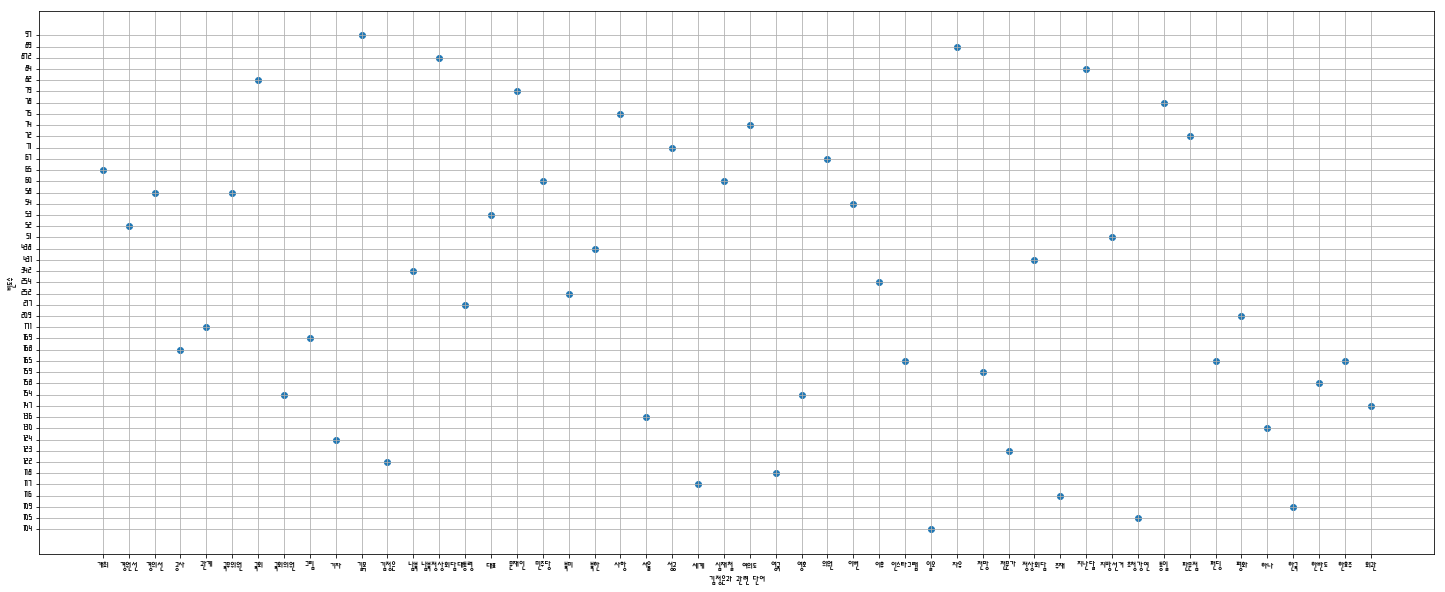

In [15]:
plt.xlabel('남북정상회담 전')
plt.grid(True)

plt.scatter(x,y)

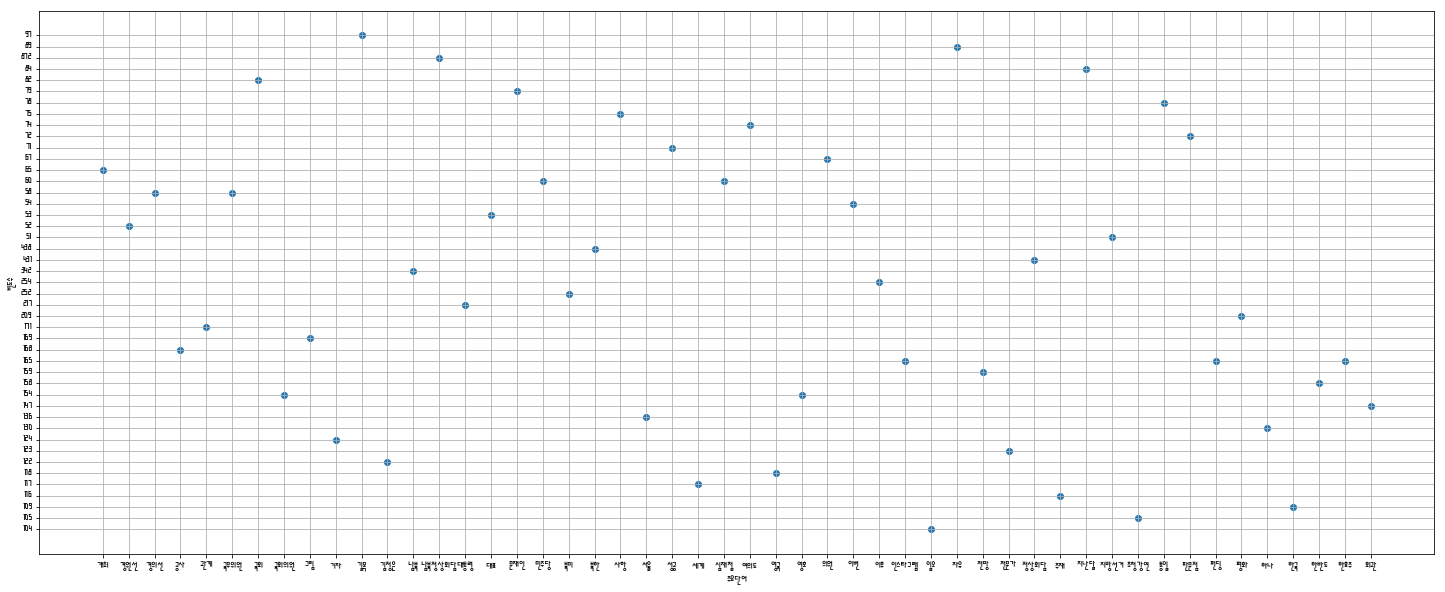

In [16]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10) 

x=Before_Korea['주요단어']
y=Before_Korea['빈도수']

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
plt.scatter(x,y)

In [17]:
Before_Korea_D = pd.Series(Before_Korea.빈도수, dtype ='i')
Before_Korean_N = pd.Series(Before_Korea.주요단어)

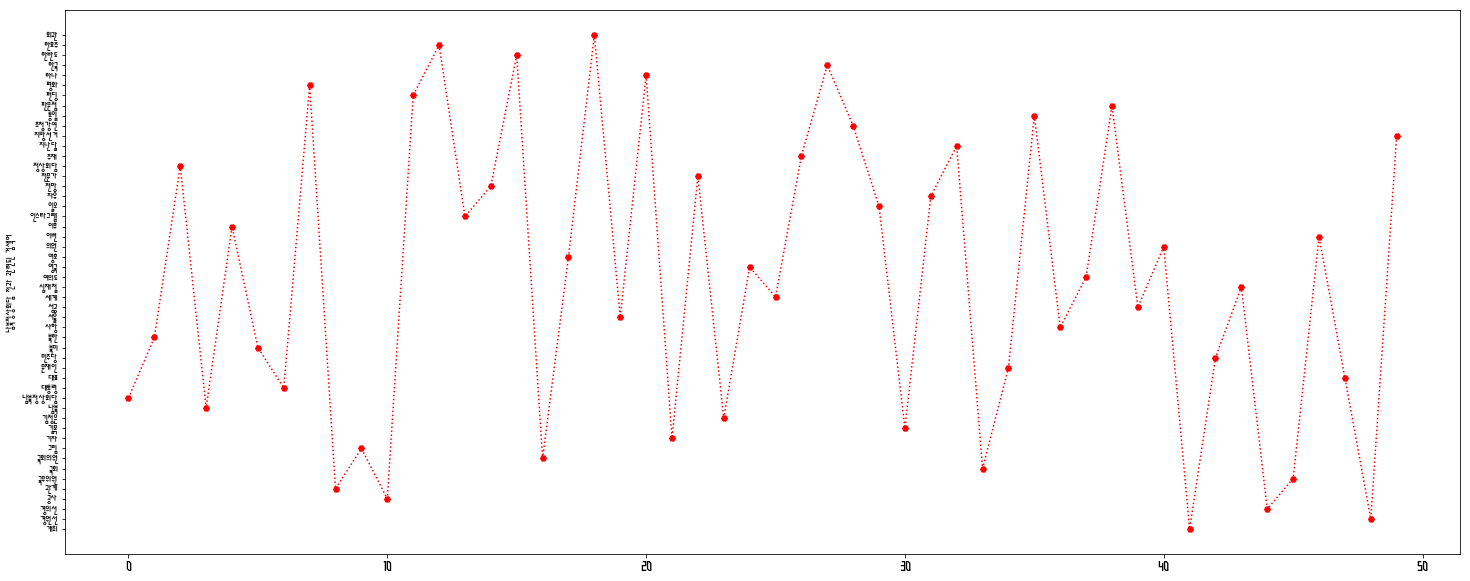

In [22]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10)
plt.plot(Before_Korea.index, Before_Korean_N, 'rH:') 
plt.ylabel('남북정상회담 전과 관련된 검색어') 
matplotlib.pyplot.xticks(fontsize=16)
plt.show()

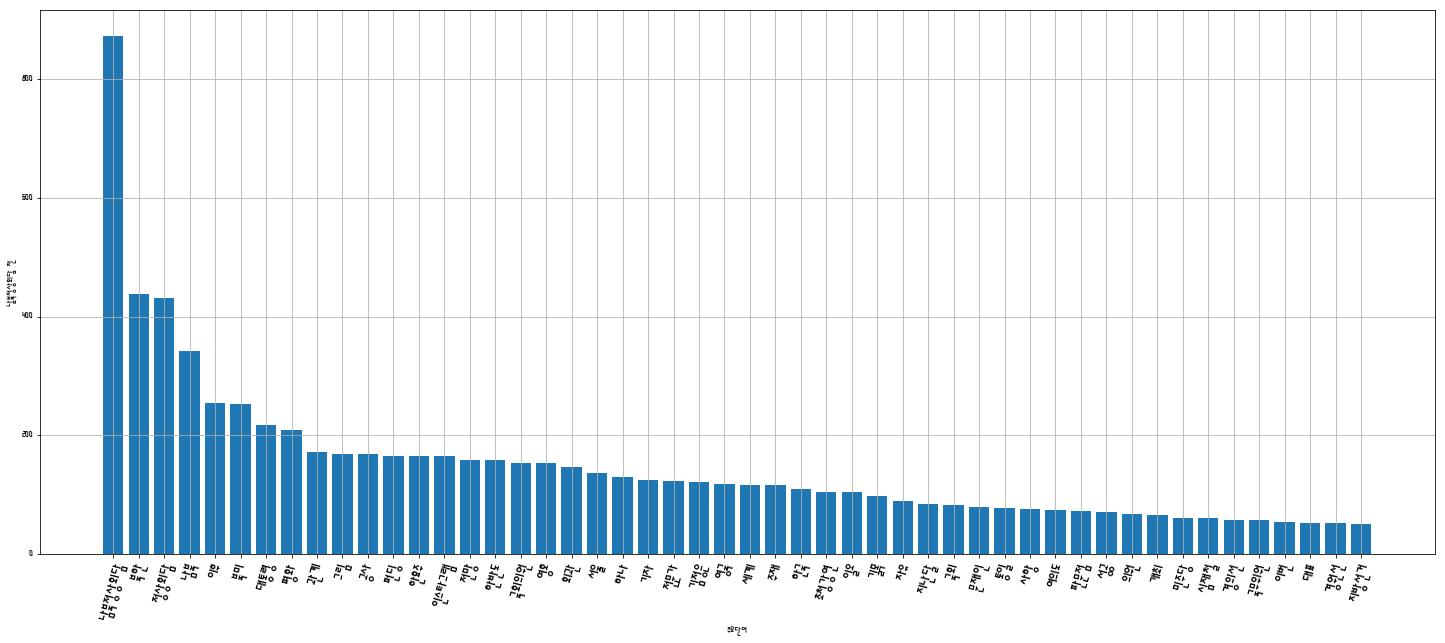

In [27]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

plt.xlabel('주요단어')
plt.ylabel('빈도수')
plt.grid(True)
    
plt.rcParams["figure.figsize"] = (25,10)
plt.bar(Before_Korea.index, Before_Korea_D)#,) 'cH:', lw=5, ms=10) 
plt.xticks(Before_Korea.index, Before_Korean_N, rotation='75')
plt.ylabel('남북정상회담 전')
matplotlib.pyplot.xticks(fontsize=16)
plt.show()

In [ ]:
font_location="C:\Windows\Fonts\H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

plt.rcParams["figure.figsize"] = (25,10)
plt.plot(KimJunEn.index, KimJunEn_N, 'rH:') 
plt.ylabel('남북정상회담') 
matplotlib.pyplot.xticks(fontsize=16)
plt.show()